### <p style="text-align: right;"> &#9989; Nathan Kurt</p>

# __CMSE  201 - Fall 2018__

<img src="https://cmse.msu.edu/_cmse/assets/Image/CMSE-bigger.png"
     alt="CMSE Grapical Image"
     align="right" 
     height="82" 
     width="82" />

# Homework 3: ODEINT, Compartmental Modeling and 2D NumPy Arrays

In this homework you will get more practice using `odeint` and developing compartmental models. You'll also get a chance to use 2D `numpy` arrays. Along the way you will also do more plotting and data visualization with `matplotlib`.

## Goals

### By the end of the homework assignment you will have practiced:

1. Using `odeint`
2. Using `matplotlib`
3. Using 2D `numpy` arrays
4. Developing compartmental models

## Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

**This assignment is due roughly two weeks from now at 11:59pm on Friday, October 12th.** It should be uploaded into the "Homework Assignments" dropbox folder for Homework #2.  Submission instructions can be found at the end of the notebook.

## Grading

* **Question 1: Modeling chaotic dynamics** (7 points)
    - Part 1 (3 points)
    - Part 2 (2 points)
    - Part 3 (2 points)
* **Question 2: Viral kinetics revisited** (7 points)
    - Part 1 (3 points)
    - Part 2 (4 points)
* **Question 3: Simulating heat diffusion** (6 points)
    - Part 1 (2 points)
    - Part 2 (1 point)
    - Part 3 (2 points)

Total points possible: **19**
___

## Before you start, import 

Before you begin, import the following modules and libraries in the cell below:
* `numpy`
* `pyplot`
* `odeint`
* `Axes3D`

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline

# Note that the SciPy library is needed for odeint
from scipy.integrate import odeint

## Question 1: Modeling chaotic dynamics (7 points)

The Rössler system is a system of three non-linear ordinary differential equations originally studied by Otto Rössler in 1976. They are defined as:

\begin{align*}
\frac{dx}{dt} &= -y - z \\
\frac{dy}{dt} &= x + ay \\
\frac{dz}{dt} &= b + z(x - c)
\end{align*}

where $a, b, c$ are parameters. The interesting thing about this systems of ODEs is that for certain values of $a, b, c$ the dynamics of the system can exhibit stable behavior, and then for other values it exhibits what is known as chaotic behavior. After Rössler introduced the system, it was also later realized that it can be used to model certain chemical reactions. Let's investigate further using `odeint` and `matplotlib`!

### Part 1: Solving the Rössler System with `odeint` (3 points)

Use `odeint` to solve the Rössler system. Use the following settings for the parameters, initial conditions, and list of times:

* Parameters: $a = 0.1$, $b = 0.1$, $c = 4.0$
* Initial conditions: $x_0 = 2$, $y_0 = 0$, $z_0 = 0$
* Times: $0 \leq t \leq 500$ with $\Delta t = 0.1$

Write your derivatives function to accept as inputs the parameters $a, b, c$, and pass them to the derivatives function within `odeint` using the `args` input. Check out the `odeint` [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) if you need help!

In [65]:
# Put your code here (create as many cells as you need!)

def derivative(current_state, time,a,b,c):
    x0 = current_state[0]
    y0 = current_state[1]
    z0 = current_state[2]
    dxdt = -y0 - z0
    dydt = x0 + a*y0
    dzdt = b + z0*(x0-c)
    return [dxdt,dydt,dzdt]

a = .1
b = .1
c = 4.0
initial_conditions = [2,0,0]
time = np.arange(0,500,.1)
result = odeint(derivative, initial_conditions, time, args=(a,b,c) )

xt = result[:,0]
yt = result[:,1]
zt = result[:,2]

### Part 2: Plotting your solution and interpreting the data (2 points)

Now that you have solved the Rössler system using `odeint` and with the parameters listed above, let's plot it! Write a function that takes in $x, y, z$ (and whatever else you need), and creates four plots:

1. A 3D plot of $x(t)$ vs. $y(t)$ vs. $z(t)$ for $0 \leq t \leq 500$
2. A 2D plot of $x(t)$ vs. $y(t)$ for $0 \leq t \leq 500$
3. A 3D plot of $x(t)$ vs. $y(t)$ vs. $z(t)$ for $50 \leq t \leq 500$
4. A 2D plot of $x(t)$ vs. $y(t)$ for $50 \leq t \leq 500$

Remember to label the axes and give the plots titles (and whatever else you think will help)! Then in the markdown cell below, explain what your observe about the solution. To help with your explanation, plot the solution for a (few) different initial values $x_0$, $y_0$, $z_0$ - you should see the emergence of an "attractor." Explain what this means in your own words.

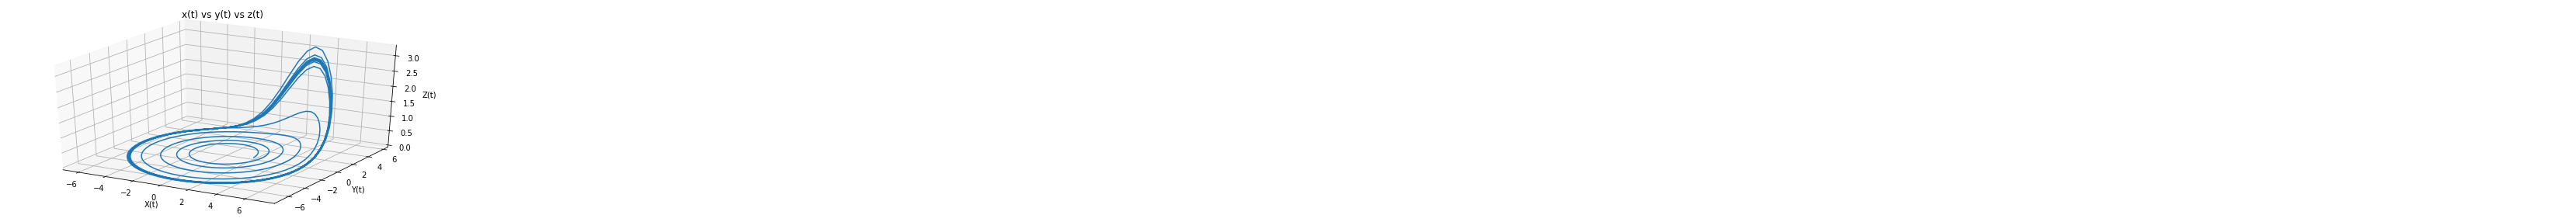

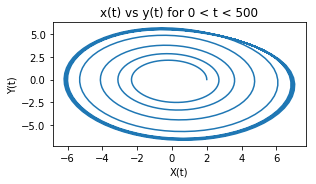

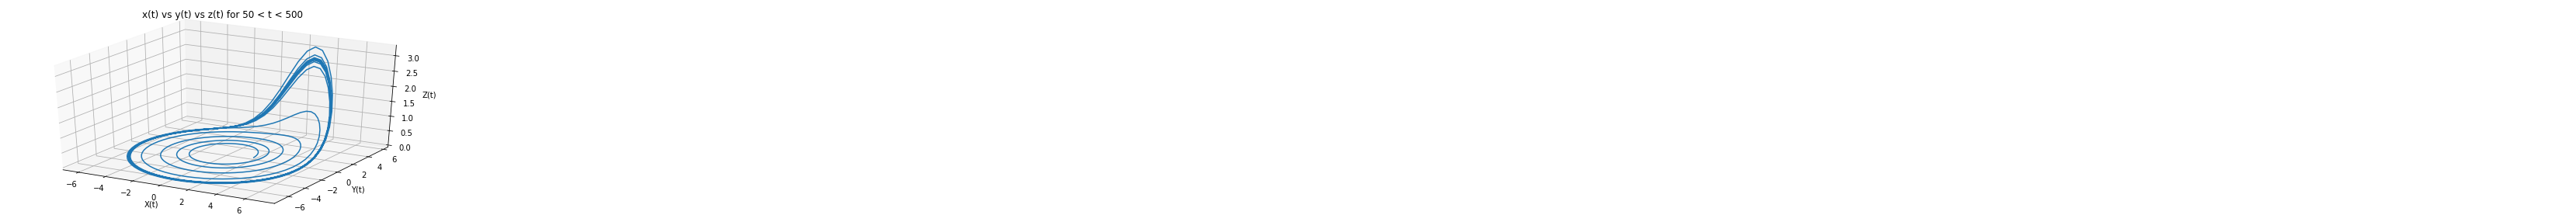

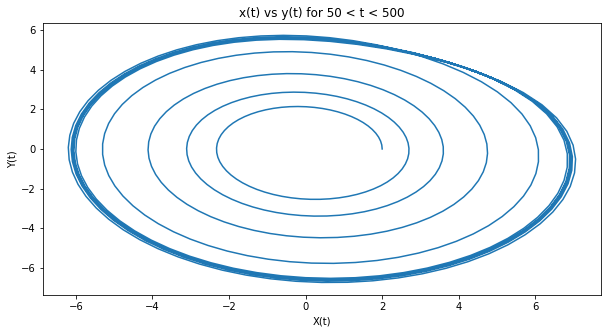

In [77]:
# Put your code here (create as many cells as you need!)

time = np.arange(0,500,.1)
result = odeint(derivative, initial_conditions, time, args=(a,b,c) )

xt = result[:,0]
yt = result[:,1]
zt = result[:,2]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1,projection="3d")
ax.plot(xt,yt,zt)
ax.set_xlabel("X(t)")
ax.set_ylabel("Y(t)")
ax.set_zlabel("Z(t)")
plt.title("x(t) vs y(t) vs z(t)")

fig2 = plt.figure(figsize=(10,5))
ax2 = fig2.add_subplot(222)
ax2.plot(xt,yt)
ax2.set_xlabel("X(t)")
ax2.set_ylabel("Y(t)")
ax2.set_title("x(t) vs y(t) for 0 < t < 500")

new_time = np.arange(50,500,.1)
new_result = odeint(derivative, initial_conditions, new_time, args=(a,b,c) )
xt2 = new_result[:,0]
yt2 = new_result[:,1]
zt2 = new_result[:,2]

fig3 = plt.figure(figsize=(10,5))
ax3 = fig3.add_subplot(1,1,1,projection="3d")
ax3.set_xlabel("X(t)")
ax3.set_ylabel("Y(t)")
ax3.set_zlabel("Z(t)")
ax3.set_title("x(t) vs y(t) vs z(t) for 50 < t < 500")
ax3.plot(xt2,yt2,zt2)

fig4 = plt.figure(figsize=(10,5))
ax4 = fig4.add_subplot(111)
ax4.set_xlabel("X(t)")
ax4.set_ylabel("Y(t)")
ax4.set_title("x(t) vs y(t) for 50 < t < 500")
ax4.plot(xt2,yt2)

#### Explain what you observe here!
Theres a circle that swirls towards the middle but on the z axis it looks like it starting to move up and not be so circly

### Part 3: Trying other parameters (2 points)

Now that you have successfully solved the Rössler system for one set of parameters $a, b, c$, and visualized your solution, let's try some other parameters. Solve the Rössler system with the following paramters $a, b, c$, and for each set of parameters use your function from Part 2 to provide the same four plots as before.

* $a = 0.1$, $b = 0.1$, $c = 6.0$
* $a = 0.1$, $b = 0.1$, $c = 8.5$
* $a = 0.1$, $b = 0.1$, $c = 9.0$

In the markdown cell below, explain how the solution changes with the parameter choices (note, $c = 9.0$ leads to chaotic dynamics - in your own words, what does this mean?)

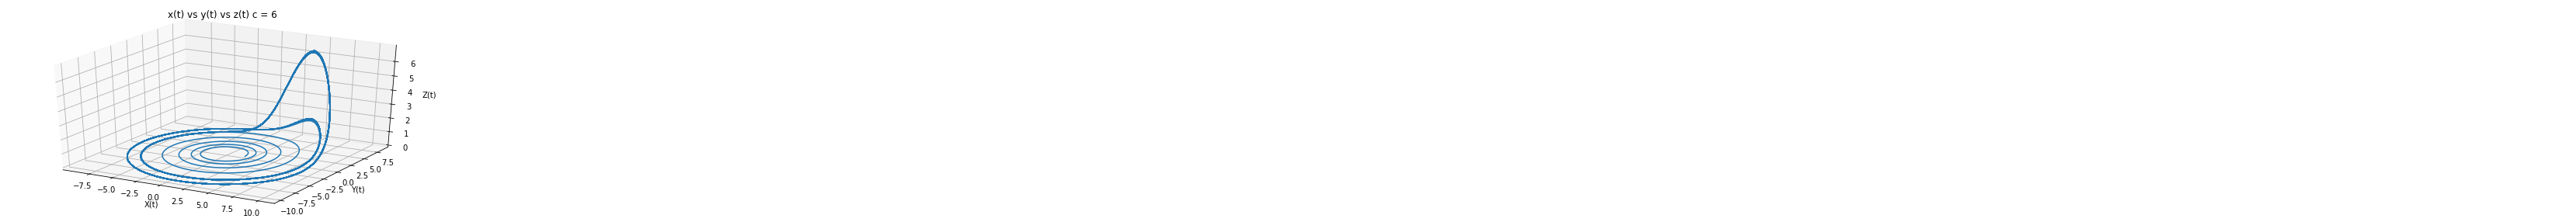

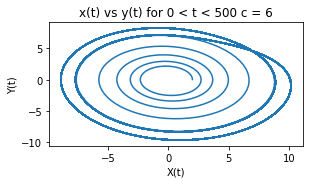

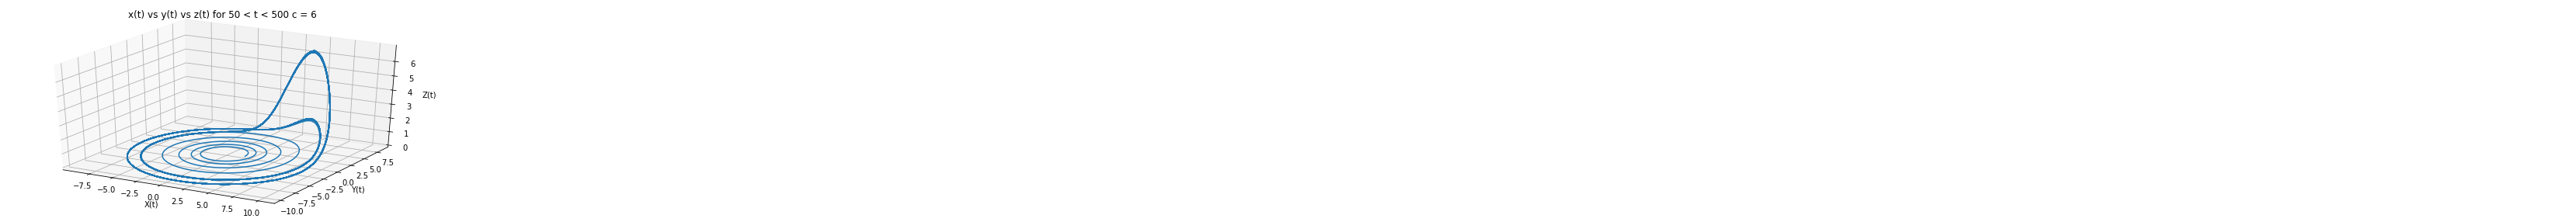

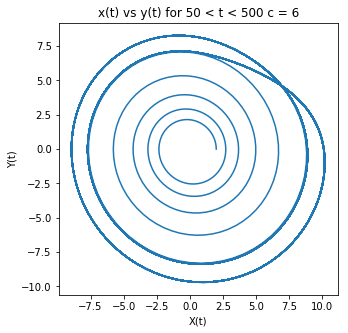

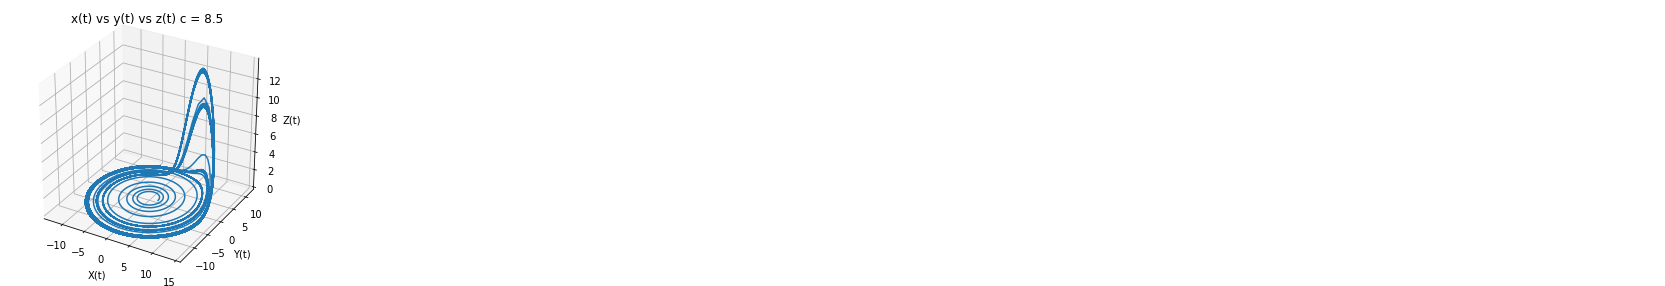

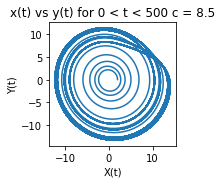

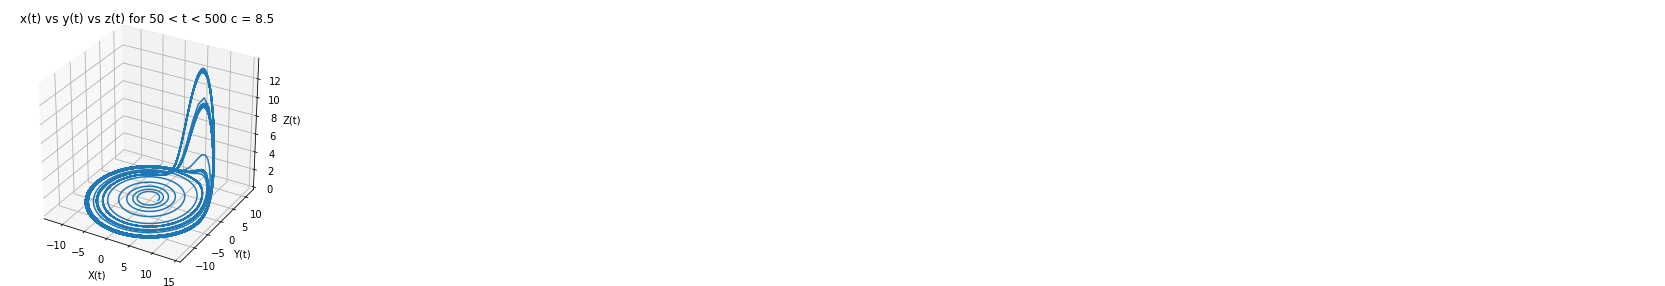

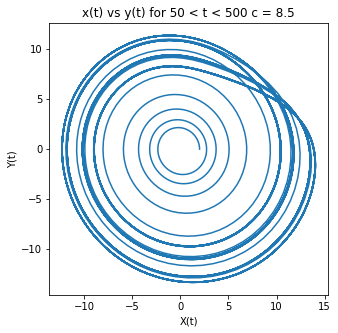

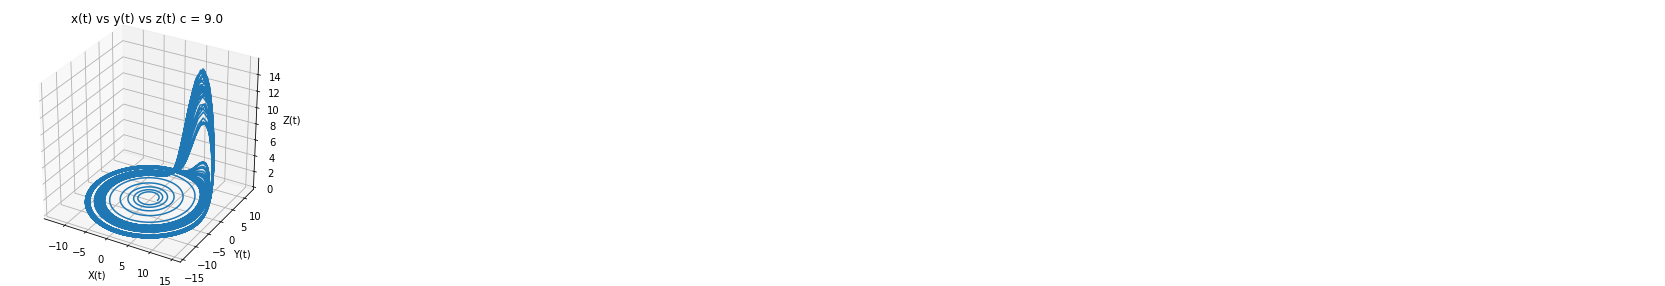

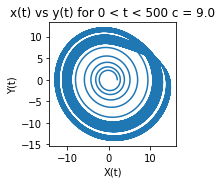

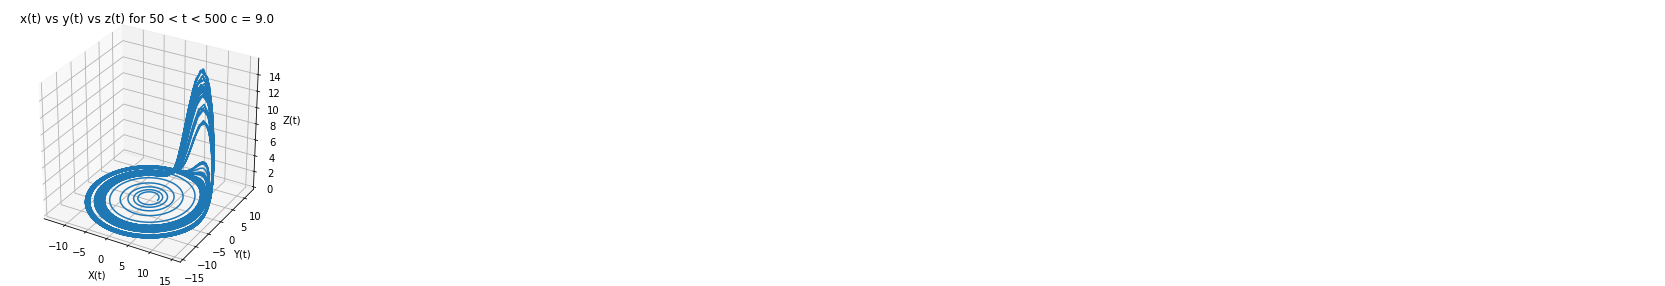

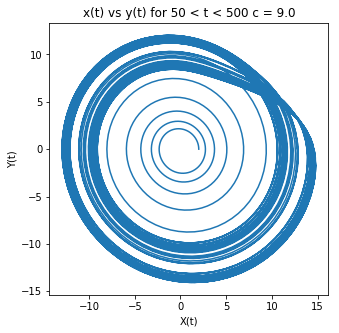

In [74]:
# Put your code here (create as many cells as you need!)
c = 6.0
time = np.arange(0,500,.1)
result = odeint(derivative, initial_conditions, time, args=(a,b,c) )

xt = result[:,0]
yt = result[:,1]
zt = result[:,2]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1,projection="3d")
ax.plot(xt,yt,zt)
ax.set_xlabel("X(t)")
ax.set_ylabel("Y(t)")
ax.set_zlabel("Z(t)")
plt.title("x(t) vs y(t) vs z(t) c = 6")

fig2 = plt.figure(figsize=(10,5))
ax2 = fig2.add_subplot(222)
ax2.plot(xt,yt)
ax2.set_xlabel("X(t)")
ax2.set_ylabel("Y(t)")
ax2.set_title("x(t) vs y(t) for 0 < t < 500 c = 6")

new_time = np.arange(50,500,.1)
new_result = odeint(derivative, initial_conditions, new_time, args=(a,b,c) )
xt2 = new_result[:,0]
yt2 = new_result[:,1]
zt2 = new_result[:,2]

fig3 = plt.figure(figsize=(10,5))
ax3 = fig3.add_subplot(1,1,1,projection="3d")
ax3.set_xlabel("X(t)")
ax3.set_ylabel("Y(t)")
ax3.set_zlabel("Z(t)")
ax3.set_title("x(t) vs y(t) vs z(t) for 50 < t < 500 c = 6")
ax3.plot(xt2,yt2,zt2)

fig4 = plt.figure(figsize=(5,5))
ax4 = fig4.add_subplot(111)
ax4.set_xlabel("X(t)")
ax4.set_ylabel("Y(t)")
ax4.set_title("x(t) vs y(t) for 50 < t < 500 c = 6")
ax4.plot(xt2,yt2)

c = 8.5
time = np.arange(0,500,.1)
result = odeint(derivative, initial_conditions, time, args=(a,b,c) )

xt = result[:,0]
yt = result[:,1]
zt = result[:,2]

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1,projection="3d")
ax.plot(xt,yt,zt)
ax.set_xlabel("X(t)")
ax.set_ylabel("Y(t)")
ax.set_zlabel("Z(t)")
plt.title("x(t) vs y(t) vs z(t) c = 8.5")

fig2 = plt.figure(figsize=(5,5))
ax2 = fig2.add_subplot(222)
ax2.plot(xt,yt)
ax2.set_xlabel("X(t)")
ax2.set_ylabel("Y(t)")
ax2.set_title("x(t) vs y(t) for 0 < t < 500 c = 8.5")

new_time = np.arange(50,500,.1)
new_result = odeint(derivative, initial_conditions, new_time, args=(a,b,c) )
xt2 = new_result[:,0]
yt2 = new_result[:,1]
zt2 = new_result[:,2]

fig3 = plt.figure(figsize=(5,5))
ax3 = fig3.add_subplot(1,1,1,projection="3d")
ax3.set_xlabel("X(t)")
ax3.set_ylabel("Y(t)")
ax3.set_zlabel("Z(t)")
ax3.set_title("x(t) vs y(t) vs z(t) for 50 < t < 500 c = 8.5")
ax3.plot(xt2,yt2,zt2)

fig4 = plt.figure(figsize=(5,5))
ax4 = fig4.add_subplot(111)
ax4.set_xlabel("X(t)")
ax4.set_ylabel("Y(t)")
ax4.set_title("x(t) vs y(t) for 50 < t < 500 c = 8.5")
ax4.plot(xt2,yt2)

c = 9.0
time = np.arange(0,500,.1)
result = odeint(derivative, initial_conditions, time, args=(a,b,c) )

xt = result[:,0]
yt = result[:,1]
zt = result[:,2]

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1,projection="3d")
ax.plot(xt,yt,zt)
ax.set_xlabel("X(t)")
ax.set_ylabel("Y(t)")
ax.set_zlabel("Z(t)")
plt.title("x(t) vs y(t) vs z(t) c = 9.0")

fig2 = plt.figure(figsize=(5,5))
ax2 = fig2.add_subplot(222)
ax2.plot(xt,yt)
ax2.set_xlabel("X(t)")
ax2.set_ylabel("Y(t)")
ax2.set_title("x(t) vs y(t) for 0 < t < 500 c = 9.0")

new_time = np.arange(50,500,.1)
new_result = odeint(derivative, initial_conditions, new_time, args=(a,b,c) )
xt2 = new_result[:,0]
yt2 = new_result[:,1]
zt2 = new_result[:,2]

fig3 = plt.figure(figsize=(5,5))
ax3 = fig3.add_subplot(1,1,1,projection="3d")
ax3.set_xlabel("X(t)")
ax3.set_ylabel("Y(t)")
ax3.set_zlabel("Z(t)")
ax3.set_title("x(t) vs y(t) vs z(t) for 50 < t < 500 c = 9.0")
ax3.plot(xt2,yt2,zt2)

fig4 = plt.figure(figsize=(5,5))
ax4 = fig4.add_subplot(111)
ax4.set_xlabel("X(t)")
ax4.set_ylabel("Y(t)")
ax4.set_title("x(t) vs y(t) for 50 < t < 500 c = 9.0")
ax4.plot(xt2,yt2)

#### Explain what you observe here!
as c increases, it looks like y(t) and x(t) also increase. It also looks like the circle starts to veer towards the right a bit and up on the z axis more

## Question 2: Viral kinetics revisited (7 points)

We are going to return to the viral kinetics (VK) model from the Day 09 Pre-Class, and make some adjustments to it. Recall the VK model was:

<img src="http://www.frontiersin.org/files/Articles/32842/fmicb-03-00319-HTML/image_m/fmicb-03-00319-g001.jpg" height=700 width = 600>

where

* $T$ is the number of **T**arget cells; these are the healthy cells the virion might enter
* $I$ is the number of **I**nfected cells; these cells produce new virions, and might die over time
* $V$ is the number of **V**irions at any given time during the infection

Recall as well that we also had the following parameters:

* $\beta$: rate at which cells become infected: this reduces the value of T and increases the value of I
* $p$: the production rate of new virions, which increases the value of V
* $\delta$: rate at which infected cells die
* $r$: rate at which the immune systems can clear virions

Finally, the VK ODE model is:

\begin{align*}
\frac{dT}{dt} &= -\beta TV \\
\frac{dI}{dt} &= \beta TV - \delta I \\
\frac{dV}{dt} &= pI - rV
\end{align*}

where time variable $t$ is measured in days.

### Part 1: More potent and longer lasting viruses (3 points)

The VK model above works pretty well for viruses that our immune system can clear on its own relatively quickly. However, for more potent viruses that stay in our body longer and are not so easily cleared, we need to adjust the model. In particular, at this longer time scale the target cells can die off naturally, and are also repopulated by our body. 

Suppose that new target cells are generated by the body at the rate of $s$ per day, and that they die at a rate of $d$ per cell.

Draw a new diagram to incorporate this new part of the model, take a picture of it, and insert it into the notebook in the markdown cell below. Also, write down the exact differential equations and type them in the second markdown cell below.

#### Place the picture of your new diagram here and upload your picture with your assignment!

#### Type your new ODEs here!

Now implement your new model using `odeint`, using the following settings:

Initial values:
* $T_0 = 4$e$8$
* $I_0 = 0$
* $V_0 = 1$

Parameters:
* $\beta = 1$e$-5$
* $\delta = 1$
* $p = 0.05$
* $r = 100$
* $s = 1$e$8$
* $d = .25$

Times:
* $0 \leq t < 50$ with $\Delta t \leq 0.01$

In [ ]:
def derivs(y, t):
    
    # unpack list of incoming variables
    Dt = y[0]
    dI = y[1]
    dV = y[2]
    # use variables to compute derivatives on the right-hand-side of the above equations
    # example: dTdt = < equation from above >
    dTdt = -beta * target_0 * virions_0
    dIdt = beta * target_0 * virions_0 - (d * infected_0)
    dVdt = production_rate * infected_0 - rate * virions_0
    # return the derivatives in a list by changing the "pass" to "return" along with the correct list
    return [dTdt, dIdt, dVdt]

# STEP 3: define the initial conditions
target_0 = 4e8
infected_0 = 0.0
virions_0 = 1.0
# Here we put them all into a list so that they can be passed to odeint
y0 = [target_0, infected_0, virions_0]

# STEP 4: add time array here
time_grid  = np.arange(0, 50, .01)

beta = 1e-5
d = 1
production_rate = .05
rate = 100
s = 1e8
delta = .25


Also make three plots, one each for:

* target cell population versus time
* viral load versus time
* infected cell population versus time

Make sure to have everything labeled, title, grids and legends as appropriate. Place your code in the cell below, and then in the markdown cell below that, explain the results of your simulation. How do they compare to the results you got in your Day 09 pre-class assignment? What is the prognosis without intervention?

In [ ]:
# Put your code here (create as many cells as you need!)

#### Explain the results of your simulation here!

### Part 2: Anti-viral drugs (4 points)

For more potent and longer lasting viruses treatment may be necessary with anti-viral drugs. Suppose that an anti-viral drug can block virus production from infected cells with effectiveness $\varepsilon$, where $\varepsilon$ takes a value between 0 (no effect) and 1 (100% effective). Building upon Part 1, once again draw a new diagram to incorporate this new part of the model, take a picture of it, and insert it into the notebook in the markdown cell below. Also, write down the exact differential equations and type them in the second markdown cell below.

#### Place the picture of your new diagram here and upload your picture with your assignment!

#### Type your new ODEs here!

Now update your derivatives function from Part 1 and place the new code in the cell below.

In [ ]:
# Put your code here (create as many cells as you need!)

Now we are going to model the process of getting sick with a virus and then taking anti-viral drugs. To do so, run your code from Part 1 and then use $T(50)$, $I(50)$ and $V(50)$ as the initial values to your code from Part 2.  Run your Part 2 code for several different values of $\varepsilon$ and up to some suitable maximum time $T_{\max} > 50$, and plot $T(t)$, $I(t)$ and $V(t)$ for $0 \leq t \leq T_{\max}$, showing the evolution of these quantities during when you get sick ($0 \leq t < 50$) and when you take the drugs $50 \leq t < T_{\max}$. Interpret your results, and give an estimate for how effective the anti-viral drug must be in order for your body to clear out the virus. 

In [ ]:
# Put your code here (create as many cells as you need!)

#### How do you interpret your results? How effective must the drug be for your immune system to clear out the virus?

## Question 3: Simulating heat diffusion (5 points)

Let $u(x,y,t)$ denote the temperature of an object at the location $(x,y)$ in the plane and at time $t$. This function will change over time as heat spreads throughout space, and the heat equation is used to determine the change in the function $u(x,y,t)$ over time. The two dimensional heat equation is:

$$
\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}
$$

Intuitively, the heat equation says that the rate of change of the temperature is proportional to the "curvature" of the object. The sharper the transition in $u(x,y,t)$, as measured by the right hand side of the heat equation, the faster the temperature will change in time (which is the left hand side).

We are going to simulate heat diffusion on a hot plate. If our intuition is correct, we would expect the heat to diffuse fastest at the edge of the plate, and slowest in the center. Let's see what happens!

### Part 1: Creating a hot plate in Python (2 points)

First we need to create a hot plate, in Python. To do so, we are going to create a two dimensional box, and put the hot plate in the center of it. To that end, create a function `make_hotplate` that takes the following inputs:

* `w`: The width of the box (in cm)
* `h`: The height of the box (in cm)
* `r`: The radius of the hot plate (in cm)
* `Tcool`: The ambient temperature in the box, not of the plate (in Farenheit)
* `Thot`: The temperature of the plate (in Farenheit)

The function should return a **2D numpy array** that represents the plate in the center of the box. You should sample the box every $\Delta x$ cm along the horizontal, and every $\Delta y$ cm along the vertical. For simplicity, you may assume that $\Delta x = \Delta y = 0.1$ cm throughout this question.

Use the function `imshow` in `matplotlib` to display your hot plate, and make sure your visualization has a colorbar and that you use the colormap 'hot'.

In [ ]:
# Put your code here (create as many cells as you need!)
def make_hotplate(w,h,r,Tcool,Thot):
    #deltax = deltaY = .1  = np.linspace(0,idk,.1)
    fig, axarr = plt.subplots(1, 3, figsize = (24, 8), sharey = True)
    axarr[0].set_title("Hotplate")

### Part 2: Implement the update equation using Numpy (1 point)

We are going to simulate the heat equation using update equations. Recall $\Delta x$ and $\Delta y$ are the step sizes along the horizontal and vertical, respectively; let $\Delta t$ be the step size in time. To use update equations we need to write $u(x, y, t + \Delta t)$ in terms of quantities of $u$ that depend on $t$ but not $\Delta t$.  Using the definition of derivative and second derivative, one can show that 

\begin{equation*}
u(x, y, t + \Delta t) \approx u(x,y,t) + \Delta t \left[ \frac{u(x + \Delta x, y, t) - 2 u(x, y, t) + u(x - \Delta x, y, t)}{(\Delta x)^2} + \frac{u(x, y + \Delta y, t) - 2 u(x,y,t) + u(x, y - \Delta y, t)}{(\Delta y)^2}\right]
\end{equation*}

Note that we also set

$$
\Delta t = \frac{1}{2} \frac{(\Delta x \Delta y)^2}{(\Delta x)^2 + (\Delta y)^2}
$$

and recall we are taking $\Delta x = \Delta y = 0.1$.

The function below, `do_timestep`, takes as an input $u(x,y,t)$ (stored as a 2D numpy array), and returns $u(x,y,t + \Delta t)$ (also stored as a 2D numpy array) using the above equation. In particular, the function will not work with lists and only works with numpy arrays. Take a look at the function, and then fill in the missing line!

In [ ]:
# This function updates from u(x,y,t) to u(x,y,t + Delta t)

def do_timestep(u):
    
    # Step stuff
    dx = 0.1     # Horizontal step
    dy = 0.1     # Vertical step
    dx2 = dx**2  # Horizontal step squared
    dy2 = dy**2  # Vertical step squared
    dt = (dx2 * dy2) / (2 * (dx2 + dy2))  # Time step
    
    # Update the solution
    u_new = u
    u_new[1:-1, 1:-1] = u[1:-1, 1:-1] + dt * (
          (u[2:, 1:-1] - 2*u[1:-1, 1:-1] + u[:-2, 1:-1])/dx2
          + (u) # MISSING LINE - FILL IN!
            )
    
    return u_new

### Part 3: Simulating heat diffusion (2 points)

Now we are ready to simulate heat diffusion! Using your function from Part 1, set your initial solution $u_0 (x,y)$ to be a hot plate that you just took out of a 500 degree (F) oven. Assume the temperature outside the oven and hence in the box is 72 degrees (F). Suppose the box is 10cm wide and 10cm high, and the plate has a radius of 2cm.

Using your update equation from Part 2, simulate the heat diffusion of the plate in the box for 100 time steps. Plot your solution after steps 1, 10, 50 and 100. Make sure that the range of the colormap is 72 to 500 for all four plots (so you can compare visually), and like before use the 'hot' colormap and make sure to place a colorbar. For the title of each plot, give the time in milliseconds (you may assume that the time variable $t$ is in seconds).

In [ ]:
# Put your code here (create as many cells as you need!)

---
## Assignment Wrap-up

Fill out the following Google form before you submit your assignment. **When you upload you assignment to D2L, ,ake sure to upload the pictures of your compartmental models as well!

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://goo.gl/forms/8iBdyCMnJnPXZJdo1" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" section, find the submission folder link for Homework #3, and upload it there. **Make sure to upload the pictures of your compartmental models as well!**

&#169; Copyright 2018,  Michigan State University Board of Trustees